# Programming for Data Science - 21KHDL1
# Final Project
# Topic:

## Student Information 
| MSSV     | Họ tên          |
| -------- | --------------- |
| 21120570 | Đặng Nguyễn Thanh Tín |
| 21120574 | Nguyễn Minh Trí |
| 21120580 | Trần Thị Kim Trinh |

## Table of contents
- [Overview](#overview)
- [Data Collection](#data-collection)
- [Data Pre-processing and Exploration](#data-pre-processing-and-exploration)
- [Quick view of Data](#quick-view-of-data)
- [Questions](#questions)
- [Reflection](#reflection)
- [References](#references)


# Overview

The Kaggle dataset on drug-related deaths from 2012-2018 provides comprehensive health-related information, encompassing various factors such as drug categories, demographics including gender and age, and the geographical context of fatalities. Despite its age, this data serves as a crucial resource for comprehending the drug issue and proposing preventative measures. Analyzing the dataset can pinpoint trends and factors contributing to fatalities, supporting prevention and treatment efforts. This presents an opportunity to address the public health challenge and formulate effective anti-drug strategies.

Libraries used

In [1]:
#import những gì bạn cần ở đây
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns

# Data Collection

**The Connecticut Deaths due to Drugs Dataset** contains information about **5105** people who died due to drug overdose between **2012 and 2018** in Connecticut, US.

The dataset includes data related to the age, race, gender, place of residence of the victims as well as the drugs they overdosed on. This information can be used to understand if drug use is prevalent in a specific area or city, drug use by individuals of different age groups and races as well as the popularity of different types of drugs.

The dataset has **41 columns** and **5105 rows**. The file have the following columns:
1. `ID`: ID of Patient
2. `Date`: The time which Patient died 
3. `DateType`: Type of Date in Column 2 [Date of Reporting or Date of Death]
4. `Age`: Age of Patient
5. `Sex`: Sex of Patient
6. `Race`: Race of Patient
7. `ResidenceCity`: City of Residence
8. `ResidenceCounty`: County of Residence
9. `ResidenceState`: State of Residence
10. `DeathCity`: City of Death
11. `DeathCounty`: County of Death
12. `Location`: Location of Death [Hospital or Residence]
13. `LocationifOther`: Location of Death if Not Hospital or Residence
14. `DescriptionofInjury`: Cause of Death
15. `InjuryPlace`: Place of Event that caused Death
16. `InjuryCity`: City of Event that caused Death
17. `InjuryCounty`: County of Event that caused Death
18. `InjuryState`: State of Event that caused Death
19. `COD`: Detailed Cause of Death
20. `OtherSignifican`: Other Significant Injuries that may have lead to Death
21. `Heroin`: Drug Found in Body [Y/N] liệu heroin đã được phát hiện trong mẫu từ những trường hợp tử vong hay không?
22. `Cocaine`: Drug Found in Body [Y/N]
23. `Fentanyl`: Drug Found in Body [Y/N]
24. `FentanylAnalogue`: Drug Found in Body [Y/N]
25. `Oxycodone`: Drug Found in Body [Y/N]
26. `Oxymorphone`: Drug Found in Body [Y/N]
27. `Ethanol`: Drug Found in Body [Y/N]
28. `Hydrocodone`: Drug Found in Body [Y/N]
29. `Benzodiazepine`: Drug Found in Body [Y/N]
30. `Methadone`: Drug Found in Body [Y/N]
31. `Amphet`: Drug Found in Body [Y/N]
32. `Tramad`: Drug Found in Body [Y/N]
33. `Morphine_NotHeroin`: Drug Found in Body [Y/N]
34. `Hydromorphone`: Drug Found in Body [Y/N]
35. `Other`: Drug Found in Body [Y/N]
36. `OpiateNOS`: Drug Found in Body [Y/N]
37. `AnyOpioid`: Drug Found in Body [Y/N]
38. `MannerofDeath`: Manner of Death
39. `DeathCityGeo`: City of Death
40. `ResidenceCityGeo`: City of Residence
41. `InjuryCityGeo`: City of Injury

# Data Pre-processing and Exploration

**Read Data**

In [2]:
# Đọc dữ liệu từ ./Accidental Drug Related Deaths in Connecticut-2012-2018 và lưu vào DrugDeath_df
DrugDeath_df = pd.read_csv('./Data/Accidental_Drug_Related_Deaths_2012-2022.csv')

DrugDeath_df

,Date,Date Type,Age,Sex,Race,Ethnicity,Residence City,Residence County,Residence State,Injury City,...,Xylazine,Gabapentin,Opiate NOS,Heroin/Morph/Codeine,Other Opioid,Any Opioid,Other,ResidenceCityGeo,InjuryCityGeo,DeathCityGeo
0,12/31/2022,Date of death,54.0,Male,White,NaN,OAKVILLE,LITCHFIELD,CT,WATERBURY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"OAKVILLE, CT\r\n(41.58854000000008, -73.086909...","WATERBURY, CT\r\n(41.55490000000003, -73.04646...","CT\r\n(41.57350273000003, -72.73830590799997)"
1,12/31/2022,Date of death,61.0,Female,White,NaN,LEBANON,NEW LONDON,CT,WILLIMANTIC,...,Y,NaN,NaN,NaN,NaN,Y,NaN,"LEBANON, CT\r\n(41.64541000000003, -72.2009799...","WILLIMANTIC, CT\r\n(41.71096000000006, -72.205...","CT\r\n(41.57350273000003, -72.73830590799997)"
2,12/31/2022,Date of death,54.0,Male,White,NaN,WEST HAVEN,NEW HAVEN,CT,WEST HAVEN,...,NaN,NaN,NaN,y,NaN,Y,NaN,"WEST HAVEN, CT\r\n(41.27228000000008, -72.9499...","WEST HAVEN, CT\r\n(41.27228000000008, -72.9499...","CT\r\n(41.57350273000003, -72.73830590799997)"
3,12/30/2022,Date of death,48.0,Male,White,NaN,SOMERS,TOLLAND,CT,SOMERS,...,NaN,NaN,NaN,NaN,Buprenorphine,Y,Buprenorphine,"SOMERS, CT\r\n(41.98825000000005, -72.44012999...","SOMERS, CT\r\n(41.98825000000005, -72.44012999...","CT\r\n(41.57350273000003, -72.73830590799997)"
4,12/29/2022,Date of death,41.0,Female,Black or African American,NaN,BRIDGEPORT,FAIRFIELD,CT,BRIDGEPORT,...,NaN,Y,NaN,NaN,NaN,Y,NaN,"BRIDGEPORT, CT\r\n(41.18213000000003, -73.1906...","BRIDGEPORT, CT\r\n(41.18213000000003, -73.1906...","CT\r\n(41.57350273000003, -72.73830590799997)"


**How many rows and how many columns?**

In [3]:
# Lưu số dòng của DrugDeath_df vào n_rows và số cột của DrugDeath_df vào n_cols
n_rows, n_cols = DrugDeath_df.shape

# In ra màn hình số dòng và số cột của DrugDeath_df
print(f'({n_rows}, {n_cols})')

(10654, 48)


**What is the meaning of each row?**

Each row in this dataset represents information about an individual who passed away due to a drug overdose. Specifically:

<li><b>Demographic Information</b>: Age, gender, race, residential address.</li>
<li><b>Death Information</b>: Date of death, location of death, cause of death, manner of death.</li>
<li><b>Drug-related Information</b>: Presence of specific drugs in the body.</li>

Chọn ra các cột sẽ dùng + giải thích lí do

In [4]:
DrugDeath_df.columns

Index(['Date', 'Date Type', 'Age', 'Sex', 'Race', 'Ethnicity',
       'Residence City', 'Residence County', 'Residence State', 'Injury City',
       'Injury County', 'Injury State', 'Injury Place',
       'Description of Injury', 'Death City', 'Death County', 'Death State',
       'Location', 'Location if Other', 'Cause of Death', 'Manner of Death',
       'Other Significant Conditions ', 'Heroin',
       'Heroin death certificate (DC)', 'Cocaine', 'Fentanyl',
       'Fentanyl Analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol',
       'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Meth/Amphetamine',
       'Amphet', 'Tramad', 'Hydromorphone', 'Morphine (Not Heroin)',
       'Xylazine', 'Gabapentin', 'Opiate NOS', 'Heroin/Morph/Codeine',
       'Other Opioid', 'Any Opioid', 'Other', 'ResidenceCityGeo',
       'InjuryCityGeo', 'DeathCityGeo'],
      dtype='object')

In [5]:
DrugDeath_df = DrugDeath_df[['Date', 'Age', 'Sex', 'Race',
        'Location', 'Cause of Death', 'Heroin', 'Cocaine',
       'Fentanyl', 'Fentanyl Analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol',
       'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Meth/Amphetamine',
       'Amphet', 'Tramad', 'Hydromorphone', 'Morphine (Not Heroin)',
       'Xylazine', 'Gabapentin', 'Opiate NOS', 'Heroin/Morph/Codeine', 'ResidenceCityGeo',
       'DeathCityGeo']]

**Are there duplicated rows? + Remove duplicate**

In [6]:
# Kiểm tra các dòng bị trùng lặp
duplicate_rows = DrugDeath_df[DrugDeath_df.duplicated()]

# Hiển thị nếu có dòng bị trùng lặp
if duplicate_rows.shape[0] > 0:
    print("There are duplicated rows.")
    # Xóa các dòng trùng lặp
    DrugDeath_df.drop_duplicates(inplace=True)
    print("Duplicates removed.")
else:
    print("There are no duplicated rows.")

There are no duplicated rows.


**Conclusion:** We can see that the dataset doesn't have duplicated rows.

**What is the meaning of each column?**

- The data columns is crucial for effective analysis. By carefully examining the column titles and their respective data entries, we can decipher the information they encapsulate. Given the extensive length of the column titles, renaming them for easier handling and analysis becomes essential.

- Through a thorough review of the column titles and their contents, aligned with the context of the survey questionnaire, we can gain a comprehensive understanding of the dataset. This process will enable us to effectively rename the columns, simplifying them for easier manipulation and analysis in subsequent steps.

- The columns in this dataset provide information about emergency cases due to drug overdoses.

## Data type & missing values

In [7]:
# Kiểm tra kiểu dữ liệu hiện tại của các cột
print(DrugDeath_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10654 entries, 0 to 10653
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   10654 non-null  object 
 1   Age                    10652 non-null  float64
 2   Sex                    10645 non-null  object 
 3   Race                   10625 non-null  object 
 4   Location               10632 non-null  object 
 5   Cause of Death         10654 non-null  object 
 6   Heroin                 3472 non-null   object 
 7   Cocaine                3855 non-null   object 
 8   Fentanyl               6925 non-null   object 
 9   Fentanyl Analogue      804 non-null    object 
 10  Oxycodone              950 non-null    object 
 11  Oxymorphone            157 non-null    object 
 12  Ethanol                2878 non-null   object 
 13  Hydrocodone            163 non-null    object 
 14  Benzodiazepine         2499 non-null   object 
 15  Me

Most columns have the correct data types, with a few exceptions:

- The **Date** column should have the data type of Datetime.
- **Age** should have the data type of int instead of float.
- Columns such as **Heroin, Cocaine, Fentanyl, etc.,** which confirm the presence or absence of each toxic substance, should have a data type of bool instead of object.

In [8]:
#Chuyển cột Date thành datetime
DrugDeath_df['Date'] = pd.to_datetime(DrugDeath_df['Date'], format='%m/%d/%Y')

Ta sẽ xem xét các cột nên có kiểu dữ liệu boolean

In [9]:
#Xem các giá trị có trong các cột
drugs = ['Heroin', 'Cocaine',
       'Fentanyl', 'Fentanyl Analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol',
       'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Meth/Amphetamine',
       'Amphet', 'Tramad', 'Hydromorphone', 'Morphine (Not Heroin)',
       'Xylazine', 'Gabapentin', 'Opiate NOS', 'Heroin/Morph/Codeine']

for col in drugs: 
    print(col)
    print(DrugDeath_df[col].unique())

Heroin
[nan 'Y']
Cocaine
['Y' nan]
Fentanyl
[nan 'Y' 'Y (PTCH)' 'Y POPS']
Fentanyl Analogue
[nan 'Y']
Oxycodone
[nan 'Y']
Oxymorphone
[nan 'Y']
Ethanol
[nan 'Y' 'P']
Hydrocodone
[nan 'Y']
Benzodiazepine
[nan 'Y']
Methadone
[nan 'Y']
Meth/Amphetamine
[nan 'Y']
Amphet
[nan 'Y']
Tramad
[nan 'Y']
Hydromorphone
[nan 'Y']
Morphine (Not Heroin)
[nan 'Y' 'PCP NEG' 'NO RX BUT STRAWS' 'STOLE MEDS']
Xylazine
[nan 'Y']
Gabapentin
[nan 'Y' 'y']
Opiate NOS
[nan 'Y']
Heroin/Morph/Codeine
[nan 'y' 'Y']


In this context, treating `NaN` and `N` as equivalent is justified since there is no evidence indicating the presence of the tested substance in the victim's body. Consequently, we can replace occurrences of `NaN` with `N` in these columns.

Before converting these columns to a boolean type, special values need to be addressed. Specifically, we need to handle values other than True (Y) and False (N or NaN) in these columns. The majority of columns exhibit a standard pattern with only 'Y', 'N', and 'NaN', but there are a few exceptions.

- **Other Opioid:** Includes values [nan 'Buprenorphine' 'MDMA, Buprenorphine' 'Mitragynine' 'ketamine' 'PCP' 'Difluro' 'pcp' 'Y']. Since this column represents the presence of other addictive substances, we can treat answers like 'Buprenorphine' 'MDMA, Buprenorphine', ... as 'Y'.

- **Morphine (Not Heroin):** [nan 'Y' 'PCP NEG' 'NO RX BUT STRAWS' 'STOLE MEDS']. Firstly, let's examine the meaning of special values:
    - `PCP NEG`: Indicates a negative result for PCP, unrelated to Heroin. Treat as 'Y'.
    - `NO RX BUT STRAWS`: Indicates the absence of a prescription but presence of straws, likely unrelated to Heroin. Treat as 'Y'.
    - `STOLE MEDS`: Indicates stolen medication, unrelated to Heroin. Treat as 'Y'. 
    --> Therefore, this column can be considered 'Y' for these special cases.

- **Fentanyl:** [nan 'Y' 'Y (PTCH)' 'Y POPS']
    - `Y PTCH`: Fentanyl detected in patch form.
    - `Y POPS`: Fentanyl detected in candy form.
    Treat these values as 'Y'.

In conclusion, a common approach for all columns can be formulated as follows:

In [10]:
#chuyển thành kiểu boolean (null hoặc 'N' là False, còn lại là True)
for col in drugs: 
    DrugDeath_df[col] = DrugDeath_df[col].notnull() & (DrugDeath_df[col] != 'N')

"With each categorical column, how are values distributed?
- What is the percentage of missing values?
- How many different values? Are they abnormal?"

<h2> Handle missing value </h2>

Firstly, let's examine the number of missing values in each column.

In [11]:
missing_values = DrugDeath_df.isnull().sum().sort_values(ascending=True)

fig = go.Figure(data=[go.Bar(
    y=missing_values.index,
    x=missing_values.values,
    orientation='h',
    marker_color='#1f77b4'
)])

fig.update_layout(
    title_text='Số lượng giá trị bị thiếu của mỗi cột',
    xaxis_title='Số lượng giá trị bị thiếu',
    yaxis_title='Tên cột',
    yaxis={'autorange': 'reversed'},
    height=800
)

fig.show()


- In this process, i will use **Imputation**.
    - For categorical data, mode (the most frequent value) is often used. 
    - For numerical data, mean or median can be used depending on the data distribution.

In [12]:
categorical_cols = DrugDeath_df.select_dtypes(include=['object', 'category']).columns
numerical_cols = DrugDeath_df.select_dtypes(include=['int64', 'float64']).columns

missing_categorical_cols = [col for col in categorical_cols if DrugDeath_df[col].isnull().any()]
missing_numerical_cols = [col for col in numerical_cols if DrugDeath_df[col].isnull().any()]

print("Categorical columns with missing values:")
print(missing_categorical_cols)

print("\nNumerical columns with missing values:")
print(missing_numerical_cols)

Categorical columns with missing values:
['Sex', 'Race', 'Location', 'ResidenceCityGeo', 'DeathCityGeo']

Numerical columns with missing values:
['Age']


In [13]:
#Xử lí Age, Sex, Location, Race bằng cách điền median và mode
# For numerical columns
DrugDeath_df['Age'] = DrugDeath_df['Age'].fillna(DrugDeath_df['Age'].median())
DrugDeath_df['Age'] = DrugDeath_df['Age'].astype(int)

# For categorical columns
for col in missing_categorical_cols:
    DrugDeath_df[col] = DrugDeath_df[col].fillna(DrugDeath_df[col].mode()[0])

Let's double-check to see if there are any remaining columns with missing values.

In [14]:
missing_cols = DrugDeath_df.columns[DrugDeath_df.isnull().any()].tolist()

print("Columns with missing values:")
print(missing_cols)

Columns with missing values:
[]


<h2> Handle abnormal value </h2>

- In the column `Cause of Death`, there are values like: 
    - **Acetyl Fentanyl**, those values belong to `Fentanyl Analogue` column.
    - **Tramadol** belongs to the `Tramad` column, and there are some abnormal cases like that.
- For example: with the value `"Acute Intoxication due to the Combined Effects of Fentanyl, Xylazine, Cocaine and Tramadol"` , i will turn it into
`"Fentanyl, Xylazine, Cocaine, Tramadol"`.

- How i solve this issue?
    - Step 1: remove unwanted words, like: "Acute Intoxication due to the Combined Effects of" , "and", etc.
    - Step 2: create a new column `Details Cause` from drugs' name in the `Cause of Death` to help out later work easier.
        - For example: with the value `"Acute Intoxication due to the Combined Effects of Fentanyl, Xylazine, Cocaine and Tramadol"` , i will turn it into `"Fentanyl, Xylazine, Cocaine, Tramadol"`.





In [15]:
DrugDeath_df.columns

Index(['Date', 'Age', 'Sex', 'Race', 'Location', 'Cause of Death', 'Heroin',
       'Cocaine', 'Fentanyl', 'Fentanyl Analogue', 'Oxycodone', 'Oxymorphone',
       'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone',
       'Meth/Amphetamine', 'Amphet', 'Tramad', 'Hydromorphone',
       'Morphine (Not Heroin)', 'Xylazine', 'Gabapentin', 'Opiate NOS',
       'Heroin/Morph/Codeine', 'ResidenceCityGeo', 'DeathCityGeo'],
      dtype='object')

<h3> Step1 </h3>

In [16]:
# rename 'Cause of Death' into COD for more convienient

DrugDeath_df = DrugDeath_df.rename(columns={'Cause of Death': 'COD'})

#Tạo cột mới chứa ds các thuốc là nguyên nhân trục tiếp gây tử vong
# Đổi tên cột 'Cause of Death' thành 'COD'
DrugDeath_df['COD'] = DrugDeath_df['COD'].str.lower()

# Loại bỏ các từ không mong muốn
unwanted_words = ['from the','ination', 'combination', 'pharmaceutical','with','use','by','complications','toxic', 'abuse' ,' of ', 'toxicity associated with', 'intoxiation', 'multidrug', 'toxicity' ,'including', 'chronic substance abuse'
    'acute intoxication by the combined effects of','while using' 'recent','effects','ity' ,'toxicities','combined','intoxication', 'acute', 'due to' ,'the', 'combined effects of', 'combined drug toxicity', 'multi-drug', 'following','chronic substance use','(',')']
for word in unwanted_words:
    DrugDeath_df['COD'] = DrugDeath_df['COD'].str.replace(word, '')

# Thay thế 'and' bằng ','
DrugDeath_df['COD'] = DrugDeath_df['COD'].str.replace('and', ',')
DrugDeath_df['COD'] = DrugDeath_df['COD'].str.replace('  ', ',')
DrugDeath_df['COD'] = DrugDeath_df['COD'].str.replace('/', ',')

<h3> Step 2</h3>

In [17]:
# Lấy các giá trị duy nhất từ cột 'COD'
drug_column = DrugDeath_df.columns[8:-3]
drug_column

Index(['Fentanyl', 'Fentanyl Analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol',
       'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Meth/Amphetamine',
       'Amphet', 'Tramad', 'Hydromorphone', 'Morphine (Not Heroin)',
       'Xylazine', 'Gabapentin', 'Opiate NOS'],
      dtype='object')

Create a new column from COD , to categorize value in COD to match with the drug columns

In [18]:
#Hợp cột Fetanyl và Fentanyl Analogue thành cột Fentanyl & Analogue có giá trị True nếu có ít nhất 1 trong 2 cột trên có giá trị True
DrugDeath_df['Fentanyl & Analogue'] = DrugDeath_df['Fentanyl'] | DrugDeath_df['Fentanyl Analogue']
#Bỏ cột Fentanyl và Fentanyl Analogue
DrugDeath_df.drop(columns=['Fentanyl', 'Fentanyl Analogue'], inplace=True)

In [19]:
import pandas as pd
import numpy as np

# List of drugs
drugs = ['Heroin', 'Cocaine',
       'Fentanyl & Analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol',
       'Hydrocodone', 'Benzodiazepine', 'Methadone','Amphetamine',
       'Tramadol', 'Hydromorphone', 'Morphine',
       'Xylazine', 'Gabapentin', 'Opiate NOS', 'Heroin','Codeine']

def remove_dup(df, column):
    df[column] = df[column].apply(lambda x: ', '.join(sorted(set(str(x).strip() for x in str(x).split(', ')))))
    return df

#Function to find drugs in 'COD' and add them to 'Details Cause'
def find_drugs(row):
    global all_stripped_words
    a = []
    details_cause = []
    for drug in drugs:
        if drug.lower() in row['COD'].lower() or (drug.lower() + 's') in row['COD'].lower():
            details_cause.append(drug)
    if 'alcohol' in row['COD'].lower():
        details_cause.append('Ethanol')

    if 'fentanyl' in row['COD'].lower():
        details_cause.append('Fentanyl & Analogue')

    if 'opiates' in row['COD'].lower() or 'opiate' in row['COD'].lower() :
        details_cause.append('Opiate NOS')

    if not details_cause:
        details_cause.append('Other')
        return details_cause
    return ', '.join(details_cause)

# Apply the function to the 'COD' column
DrugDeath_df['Details Cause'] = DrugDeath_df.apply(find_drugs, axis=1)
DrugDeath_df = remove_dup(DrugDeath_df, 'Details Cause')

In [20]:
DrugDeath_df['Details Cause'].str.get_dummies(sep=', ').columns

Index(['Amphetamine', 'Benzodiazepine', 'Cocaine', 'Codeine', 'Ethanol',
       'Fentanyl & Analogue', 'Gabapentin', 'Heroin', 'Hydrocodone',
       'Hydromorphone', 'Methadone', 'Morphine', 'Opiate NOS', 'Other',
       'Oxycodone', 'Oxymorphone', 'Tramadol', 'Xylazine'],
      dtype='object')

<h2> How are values distributed? </h2>

### With number columns, how are values distributed?

In [21]:
DrugDeath_df['Age'].describe()

count    10654.000000
mean        43.515206
std         12.600651
min         13.000000
25%         33.000000
50%         43.000000
75%         54.000000
max         87.000000
Name: Age, dtype: float64

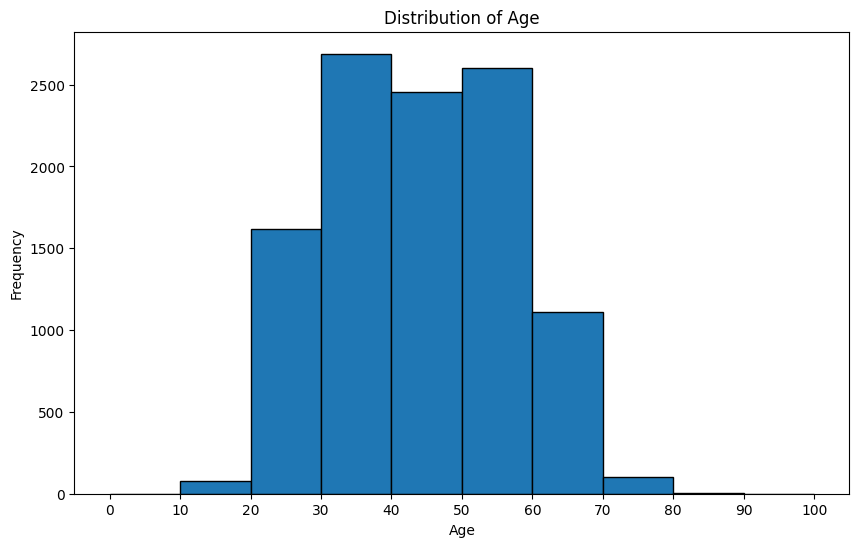

In [22]:
num_bins = int(np.sqrt((DrugDeath_df['Age'].nunique())))

plt.figure(figsize=(10,6))
plt.hist(DrugDeath_df['Age'],bins=range(0, 101, 10), edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.xticks(range(0, 101, 10))
plt.ylabel('Frequency')
plt.show()


### With categorical columns, how are values distributed?

In [ ]:
DrugDeath_df.columns

For the columns Sex, and Race, let's create pie charts to visualize the distribution of values.

We will create a bar chart to visualize the frequency of each drug found in the bodies of the victims.

In [23]:
import plotly.express as px
drug_column = ['Heroin', 'Cocaine',
       'Oxycodone', 'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine',
       'Methadone', 'Meth/Amphetamine', 'Amphet', 'Tramad', 'Hydromorphone',
       'Morphine (Not Heroin)', 'Xylazine', 'Gabapentin', 'Opiate NOS',
       'Heroin/Morph/Codeine', 'Fentanyl & Analogue']

#LẶp qua tất cả các cột thuốc, vì đây là boolean nên chỉ cần dùng .sum() để đếm số lượng True
drugs_found = DrugDeath_df[drug_column].sum().sort_values(ascending=False)
drugs_found 

# Chuyển đổi Series thành DataFrame để vẽ biểu đồ
drugs_found_df = drugs_found.reset_index()
drugs_found_df.columns = ['Drug', 'Count']

# Vẽ biểu đồ cột
fig = px.bar(drugs_found_df, x='Drug', y='Count', title='Số lượng bệnh nhân', color_discrete_sequence=['steelblue'])
fig.show()


For the column indicating the cause of death, we will examine how many victims were directly related to each type of drug.

In [24]:
# value count for each name of drug in each row

def count_drug_frequency(df, column):
    # Split the column into separate drugs
    df[column] = df[column].str.split(',')

    # Expand the lists into separate rows
    df = df.explode(column)

    # Strip leading/trailing whitespace
    df[column] = df[column].str.strip()

    # Count the frequency of each drug
    drug_counts = df[column].value_counts()

    return drug_counts

drug_counts = count_drug_frequency(DrugDeath_df.copy(), 'Details Cause')

# Chuyển đổi Series thành DataFrame để vẽ biểu đồ
drug_counts_df = drug_counts.reset_index()
drug_counts_df.columns = ['Drug', 'Count']

# Vẽ biểu đồ cột
fig = px.bar(drug_counts_df, x='Drug', y='Count', title='Tần suất xuất hiện của từng loại thuốc', color_discrete_sequence=['steelblue'])
fig.show()


In [ ]:
DrugDeath_df['Details Cause'].str.get_dummies(sep=', ').columns

## 3.2 The correlation between "Age" and "Types of drugs"

### Step 1: Calculating correlation coefficients

In [25]:
# Sao lưu một bản sao của DataFrame gốc
df_copy = DrugDeath_df.copy()

# Tạo một dictionary để lưu trữ hệ số tương quan giữa 'Age' và các thuốc
correlations = {}

# Lặp qua từng cột thuốc và tính toán tương quan
for column in df_copy.columns:
    if df_copy[column].dtype == bool:  # Chỉ xem xét các cột dạng boolean
        correlation = df_copy['Age'].corr(df_copy[column].astype(int), method='pearson')
        correlations[column] = correlation

# In ra các hệ số tương quan
for drug, correlation in correlations.items():
    print(f"Correlation between Age and {drug}: {correlation}")


Correlation between Age and Heroin: -0.07954282704926738
Correlation between Age and Cocaine: 0.05854990200908166
Correlation between Age and Oxycodone: 0.08755426001543642
Correlation between Age and Oxymorphone: 0.018430006763438842
Correlation between Age and Ethanol: 0.07229435752075965
Correlation between Age and Hydrocodone: 0.06154210067710383
Correlation between Age and Benzodiazepine: 0.018169514531857063
Correlation between Age and Methadone: 0.07257838402874137
Correlation between Age and Meth/Amphetamine: -0.041968240147605466
Correlation between Age and Amphet: -0.05156026157960707
Correlation between Age and Tramad: 0.058117124313291635
Correlation between Age and Hydromorphone: 0.030105710979642347
Correlation between Age and Morphine (Not Heroin): 0.0302137338762264
Correlation between Age and Xylazine: 0.02814084981759481
Correlation between Age and Gabapentin: 0.09800964090994865
Correlation between Age and Opiate NOS: 0.007103311719656147
Correlation between Age and 

### Step 2: Visualize by heatmap

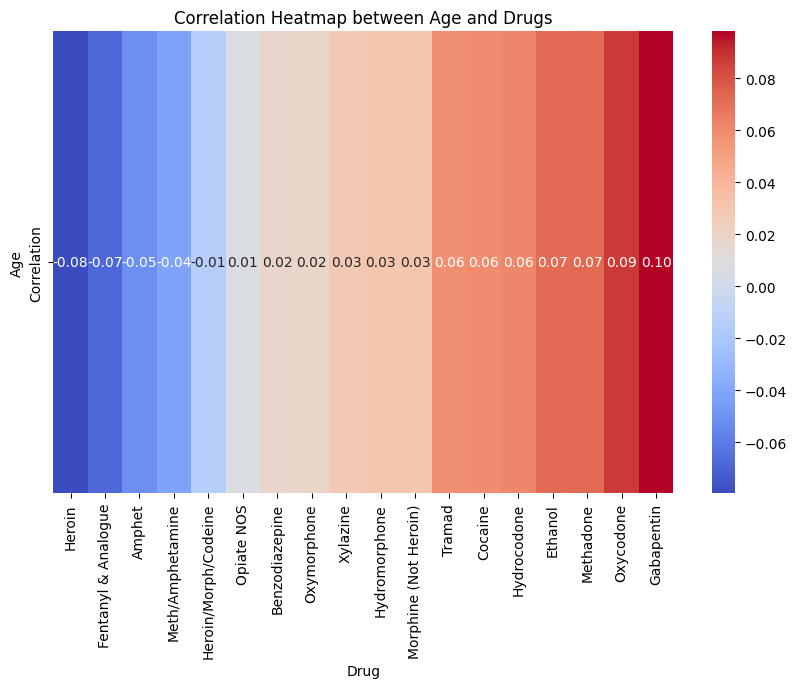

In [26]:
# Chuyển đổi dictionary thành DataFrame để vẽ biểu đồ
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Drug', 'Correlation'])

# Sắp xếp DataFrame theo giá trị tăng dần của hệ số tương quan
correlation_df = correlation_df.sort_values(by='Correlation')

# Tạo DataFrame có chỉ số là tên thuốc và cột là 'Age' và giá trị là hệ số tương quan
heatmap_data = correlation_df.set_index('Drug').T

# Vẽ biểu đồ heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap between Age and Drugs')
plt.xlabel('Drug')
plt.ylabel('Age')
plt.show()

**Nhận xét:**
- Các loại ma túy có mức tương quan tiêu cực mạnh với tuổi tác (màu xanh lam sẫm) bao gồm: Heroin và Fentanyl. Điều này có thể cho thấy rằng những loại ma túy này thường được sử dụng nhiều hơn bởi những người trẻ tuổi.
- Ma túy có mức tương quan tiêu cực nhẹ hơn (màu xanh nhạt) bao gồm: Amphet và Meth/Amphetamine.
- Gabapentin có mức tương quan tích cực mạnh nhất với tuổi tác (màu đỏ sẫm), có nghĩa là loại ma túy này có thể được sử dụng nhiều hơn bởi những người lớn tuổi.
- Các loại ma túy khác như Cocaine, Methadone, và Hydrocodone cũng cho thấy một mức độ tương quan tích cực nhẹ hơn (màu đỏ nhạt).

## 3.3 What is the death rate between males and females?

### Step 1: Calculate death rate for each gender

In [27]:
# Sao lưu một bản sao của DataFrame gốc
df_copy = DrugDeath_df.copy()

# Lọc các hàng có thông tin giới tính hợp lệ và chi tiết về nguyên nhân tử vong không thiếu
filtered_df = df_copy[(df_copy['Sex'].isin(['Male', 'Female'])) & (df_copy['Details Cause'].notna())]

# Tính tỷ lệ tử vong cho mỗi giới tính
death_rate_by_gender = filtered_df.groupby('Sex')['Details Cause'].count() / len(filtered_df) * 100

# In tỷ lệ tử vong cho nam và nữ
print(f"Death rate for males: {death_rate_by_gender['Male']:.2f}%")
print(f"Death rate for females: {death_rate_by_gender['Female']:.2f}%")

Death rate for males: 74.14%
Death rate for females: 25.86%


### Step 2: Visualize by bar chart

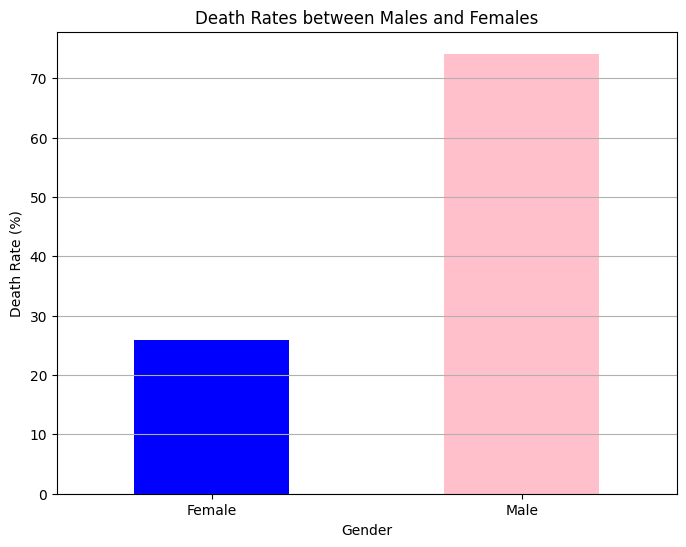

In [28]:
# Vẽ biểu đồ tỷ lệ tử vong
plt.figure(figsize=(8, 6))
death_rate_by_gender.plot(kind='bar', color=['blue', 'pink'])
plt.title('Death Rates between Males and Females')
plt.xlabel('Gender')
plt.ylabel('Death Rate (%)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

**Nhận xét:**
- Tỉ lệ tử vong ở phụ nữ được biểu thị bằng một cột màu xanh dương với chiều cao khoảng hơn 20%, cho thấy tỉ lệ tử vong trong nhóm này.
- Tỉ lệ tử vong ở nam giới đáng chú ý cao hơn nhiều, với cột màu hồng chiếm khoảng hơn 60% tỉ lệ tử vong.

## 3.4 Sự thay đổi tỉ lệ tử vong qua từng năm

### Step 1: Related to each type of drug and the 'Location' column

In [29]:
# Sao lưu một bản sao của DataFrame gốc
df = DrugDeath_df.copy()

# Chuyển đổi cột 'Date' thành định dạng datetime
df['Date'] = pd.to_datetime(df['Date'])

# Tạo cột 'Year' từ 'Date'
df['Year'] = df['Date'].dt.year

# Tính số nạn nhân tử vong mỗi năm
yearly_deaths = df.groupby('Year').size().reset_index(name='Number of Deaths')

# Vẽ biểu đồ đường cho số nạn nhân tử vong mỗi năm
fig = px.line(yearly_deaths, x='Year', y='Number of Deaths', title='Number of Deaths per Year')
fig.show()

# Tính số nạn nhân tử vong mỗi năm theo thành phố của 5 thành phố có nhiều nạn nhân nhất



## 3.5 Which are the top 5 locations with the highest number of deaths?

### Step 1: Top 5 cities with the highest death counts

In [30]:
# Sao lưu một bản sao của DataFrame gốc
df_copy = DrugDeath_df.copy()

# Nhóm theo thành phố và đếm số lượng tử vong tại mỗi thành phố
death_count_by_city = df_copy['DeathCityGeo'].value_counts()

# Chọn ra 5 thành phố có số ca tử vong cao nhất
top_5_cities = death_count_by_city.head(5)

# Hiển thị 5 thành phố có số ca tử vong cao nhất
print("Top 5 Cities with Highest Death Counts:")
print(top_5_cities)



Top 5 Cities with Highest Death Counts:
DeathCityGeo
CT\r\n(41.57350273000003, -72.73830590799997)    1453
Hartford, CT\r\n(41.765775, -72.673356)          1083
New Haven, CT\r\n(41.308252, -72.924161)          765
Waterbury, CT\r\n(41.554261, -73.043069)          728
Bridgeport, CT\r\n(41.179195, -73.189476)         625
Name: count, dtype: int64


### Step 2: Visualize

C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning:

) missing from current font.



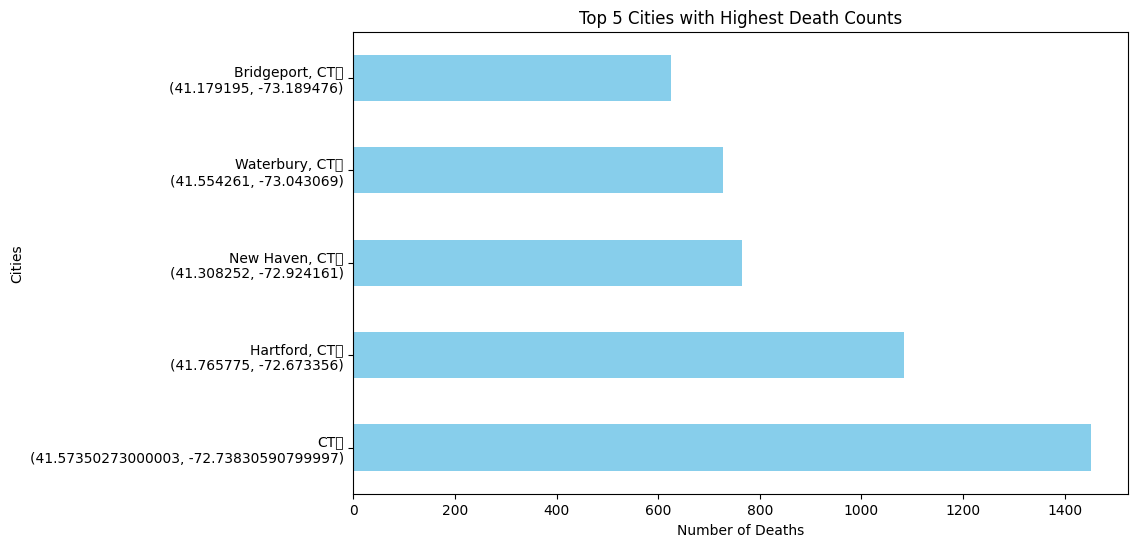

In [31]:
# Vẽ biểu đồ cho 5 thành phố có số ca tử vong cao nhất
plt.figure(figsize=(10, 6))
top_5_cities.plot(kind='barh', color='skyblue')
plt.title('Top 5 Cities with Highest Death Counts')
plt.xlabel('Number of Deaths')
plt.ylabel('Cities')
plt.show()

**Nhận xét:**
- Thành phố không rõ tên (có tọa độ 41.573507300003, -72.738509097997) dẫn đầu với số lượng tử vong vượt quá 1400.
- Hartford, CT (với tọa độ 41.765775, -72.673356) tiếp theo với số lượng tử vong hơn 800.
- New Haven, CT (tọa độ 41.308252, -72.924161) với số lượng tử vong hơn 600.
- Waterbury, CT (tọa độ 41.554261, -73.043069) có số lượng tử vong hơn 400.
- Bridgeport, CT (tọa độ 41.179195, -73.189476) với số lượng tử vong gần 400.

## 3.6 Top 5 most common details of death causes?

### Step 1: Counting occurrences of each death cause detail. Then selecting the top 5

In [32]:
# Sao lưu một bản sao của DataFrame gốc
df_copy = DrugDeath_df.copy()

# Counting occurrences of each death cause detail and selecting the top 5
top_5_death_causes = df_copy['Details Cause'].value_counts().head(5)

# Displaying the top 5 most common death cause details
print("Top 5 Most Common Death Cause Details:")
print(top_5_death_causes)

Top 5 Most Common Death Cause Details:
Details Cause
Fentanyl & Analogue             1414
Cocaine, Fentanyl & Analogue     865
Heroin                           640
Ethanol, Fentanyl & Analogue     585
Fentanyl & Analogue, Heroin      581
Name: count, dtype: int64


### Step 2: Visualize by bar chart

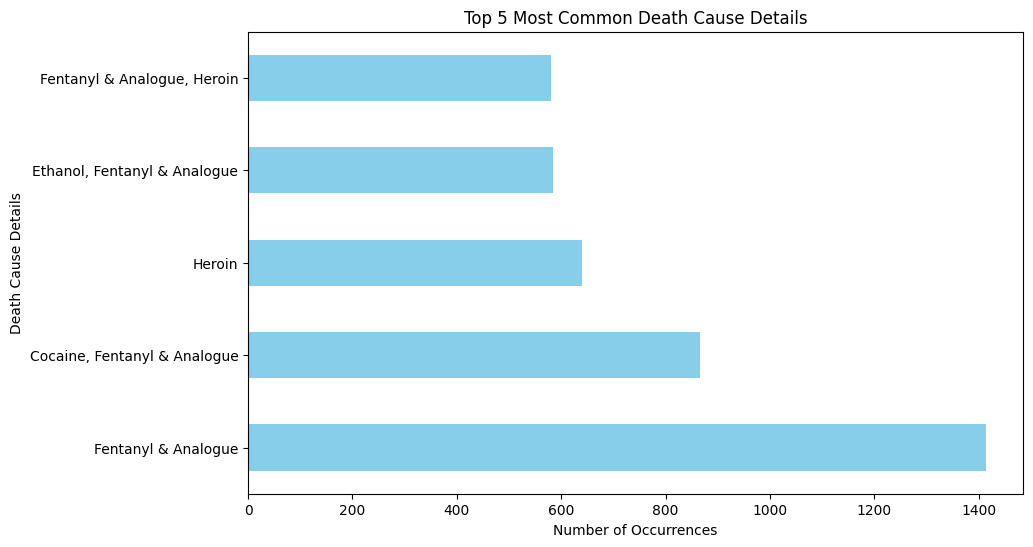

In [33]:
# Vẽ biểu đồ cho 5 nguyên nhân gây tử vong phổ biến nhất
plt.figure(figsize=(10, 6))
top_5_death_causes.plot(kind='barh', color='skyblue')
plt.title('Top 5 Most Common Death Cause Details')
plt.xlabel('Number of Occurrences')
plt.ylabel('Death Cause Details')
plt.show()

**Nhận xét:**
- Các nguyên nhân từ cao xuống thấp là:
    - Fentanyl, Fentanyl Analog, Heroin
    - Ethanol, Fentanyl, Fentanyl Analog
    - Heroin
    - Cocaine, Fentanyl, Fentanyl Analog
    - Fentanyl, Fentanyl Analog
- Nguyên nhân hàng đầu gây tử vong là sự kết hợp của Fentanyl, Fentanyl Analog và Heroin với số lần xuất hiện gần 1400 lần. Các nguyên nhân khác cũng chứa Fentanyl và các chất analog của nó, cho thấy rằng Fentanyl là một vấn đề lớn trong các trường hợp tử vong liên quan đến ma túy.
- Heroin và Ethanol cũng được nhắc đến như là các nguyên nhân chính

# 4. Meaningful Questions

## 4.1 Question 1: Tìm các thuốc(Cause) có tỉ lệ tử vong cao nhất , với các thuốc dó thì xu hướng sử dụng, xu hướng tử vong qua mỗi năm thay đổi như thế nào?

- Benefit:
    - Giúp chính phủ có biện pháp hạn chế phù hợp đối với việc sử dụng các chất trên.
    - Đưa ra cảnh báo cho người dân.


In [34]:
cause_info = cause_count = DrugDeath_df.copy()
cause_count['Details Cause'] = cause_info['Details Cause'].str.split(', ').copy()
# Sử dụng .stack() để chuyển đổi dữ liệu thành dạng stack
stacked_values = cause_count['Details Cause'].apply(pd.Series).stack()

# Đếm số lần xuất hiện của mỗi giá trị
top_5_values = stacked_values.value_counts().nlargest(5)

print(top_5_values)

Fentanyl & Analogue    6891
Cocaine                3516
Heroin                 3047
Ethanol                2847
Methadone               906
Name: count, dtype: int64


<Figure size 600x600 with 0 Axes>

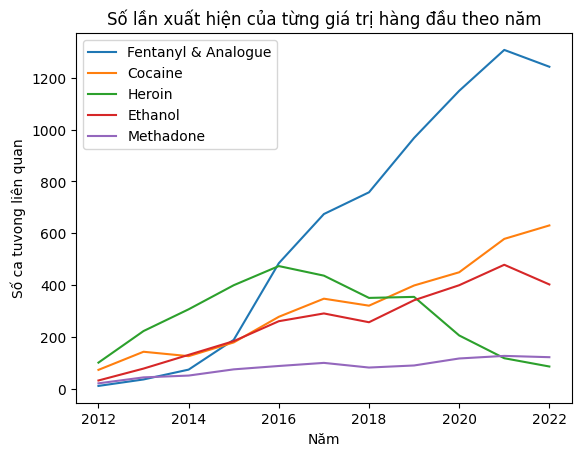

In [35]:
import matplotlib.pyplot as plt

# Tạo một cột mới 'Year' bằng cách trích xuất năm từ cột 'Date'
cause_info['Year'] = cause_info['Date'].dt.year

# Tạo DataFrame mới để lưu trữ số lần xuất hiện của từng giá trị theo năm
yearly_counts = pd.DataFrame()

# Vòng lặp qua top 5 giá trị
for value in top_5_values.index:
    # Tạo một mask boolean cho từng giá trị
    mask = cause_info['Details Cause'].apply(lambda x: value in x)
    # Đếm số lần xuất hiện của giá trị trong mỗi năm
    yearly_count = cause_info[mask].groupby('Year').size()
    # Thêm số lần xuất hiện vào DataFrame
    yearly_counts[value] = yearly_count

# Vẽ biểu đồ đường
%matplotlib inline 
plt.figure(figsize=(6, 6))
yearly_counts.plot(kind='line')
plt.title('Số lần xuất hiện của từng giá trị hàng đầu theo năm')
plt.xlabel('Năm')
# plt.xticks(range(2012, 2023))
plt.ylabel('Số ca tuvong liên quan')
# Điều chỉnh chiều rộng của trục x
plt.show()


Nhận xét:
- Chúng ta có thể thấy với hai chất `Fentanyl` và `Fentanyl Analogue`, Số ca tử vong có liên quan tới hai chất này tăng mạnh qua hàng năm và đạt đỉnh ở năm 2021 (hơn 1200 ca). Tuy nhiên  2021 trở đi, có sự giảm thiểu về số ca mà hai chất này có liên quan. 
- Với hai chất `Cocaine và Ethanol`, số ca có tử vong liên quan tới hai chất này nhìn chung luôn tăng đều. Tuy nhiên vào năm 2021, có sự suy giảm ở số lượng ca có liên quan tới `Ethanol`.
- Với `Heroin`, Số ca tử vong liên quan tới chất này đạt đỉnh ở năm 2016 với khoảng 500 ca và giảm dần cho tới năm 2022. Có thể thấy chất này được quản lí tốt.


## 4.2 Question 2:

## 4.2 Question 3: 

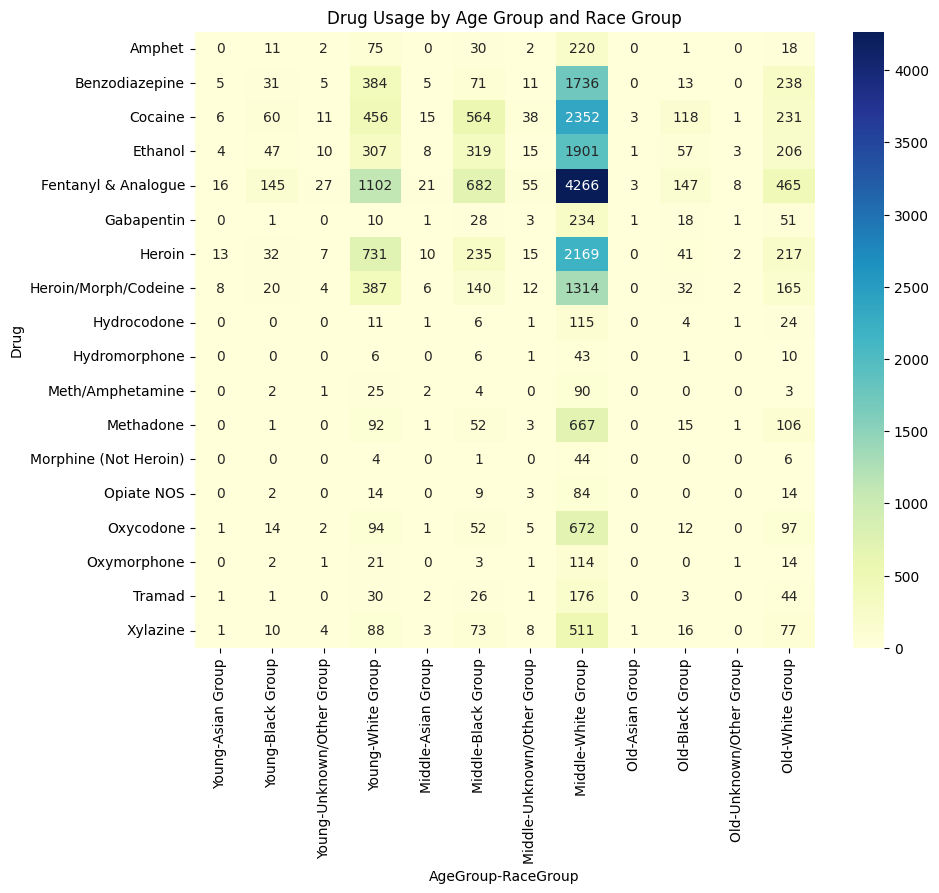

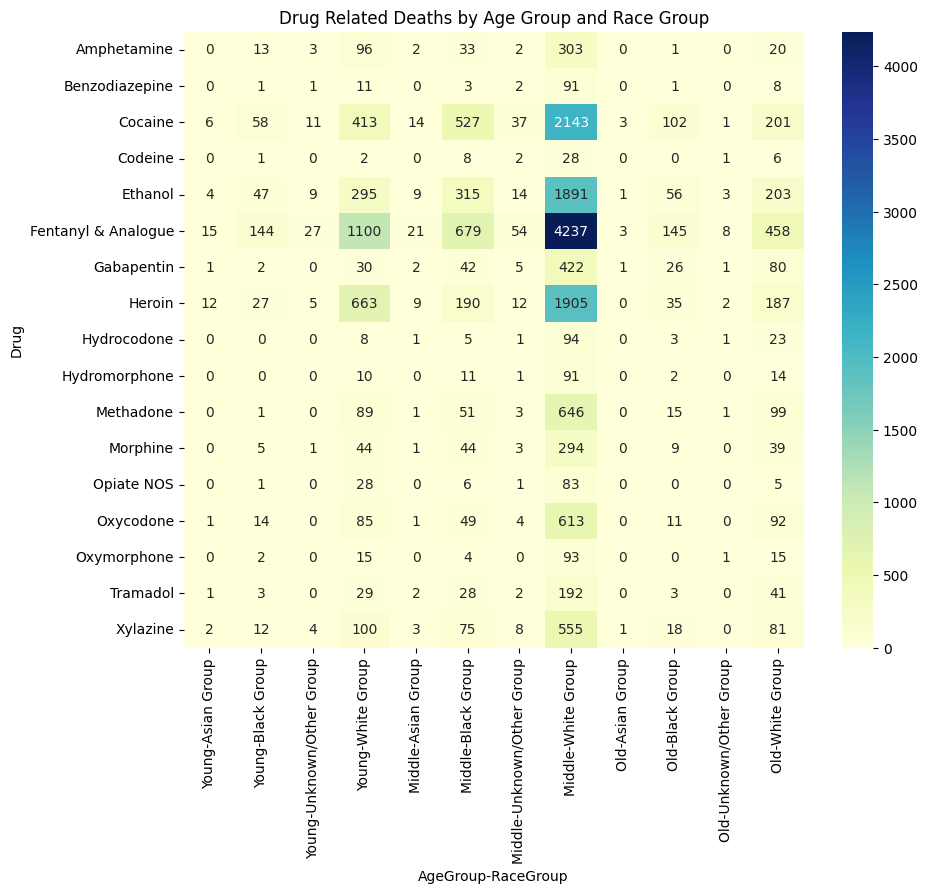

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = DrugDeath_df.copy()

drugs = ['Heroin', 'Cocaine', 'Fentanyl & Analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol',
         'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Meth/Amphetamine', 'Amphet', 'Tramad', 
         'Hydromorphone', 'Morphine (Not Heroin)', 'Xylazine', 'Gabapentin', 'Opiate NOS', 
         'Heroin/Morph/Codeine']

race_groups = {
    "White Group": ["White"],
    "Black Group": ["Black", "Black or African American"],
    "Asian Group": ["Asian, Other", "Asian Indian", "Other Asian", "Chinese", "Korean"],
    "Unknown/Other Group": ["Unknown", "Other", "American Indian or Alaska Native", "Hawaiian", "Native American, Other"]
}

bins = [0, 30, 60, 100]
labels = ["Young", "Middle", "Old"]
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)
df['RaceGroup'] = df['Race'].apply(lambda race: next((group for group, races in race_groups.items() if race in races), "Unknown/Other Group"))

# Heatmap 1
df_drug_usage = df.groupby(['AgeGroup', 'RaceGroup'])[drugs].sum().reset_index().melt(id_vars=['AgeGroup', 'RaceGroup'], value_vars=drugs, var_name='Drug', value_name='Count')

plt.figure(figsize=(10, 8))
sns.heatmap(df_drug_usage.pivot_table(index='Drug', columns=['AgeGroup', 'RaceGroup'], values='Count'), cmap='YlGnBu', annot=True, fmt=".0f")
plt.title('Drug Usage by Age Group and Race Group')
plt.show()

# Heatmap 2
drugs = ['Amphetamine', 'Benzodiazepine', 'Cocaine', 'Codeine', 'Ethanol',
       'Fentanyl & Analogue', 'Gabapentin', 'Heroin', 'Hydrocodone',
       'Hydromorphone', 'Methadone', 'Morphine', 'Opiate NOS',
       'Oxycodone', 'Oxymorphone', 'Tramadol', 'Xylazine']

df = df[['AgeGroup', 'RaceGroup', 'Details Cause']].join(df['Details Cause'].str.get_dummies(sep=', '))
df_drug_usage = df.groupby(['AgeGroup', 'RaceGroup'])[drugs].sum().reset_index().melt(id_vars=['AgeGroup', 'RaceGroup'], value_vars=drugs, var_name='Drug', value_name='Count')

plt.figure(figsize=(10, 8))
sns.heatmap(df_drug_usage.pivot_table(index='Drug', columns=['AgeGroup', 'RaceGroup'], values='Count'), cmap='YlGnBu', annot=True, fmt=".0f")
plt.title('Drug Related Deaths by Age Group and Race Group')
plt.show()


Nhận xét: 
- 3 nhóm người sử dụng nhiều ma tuý nhất là Middle-White, Middle-Black và Young-White.
- Độ tuổi dùng thuốc tập trung chủ yếu ở Yough và Middle
- Nhóm dân Châu Á ít sử dụng thuốc nhất, White dùng nhiều nhất.
- Ở các nhóm dùng ma tuý nhiều, có xu hướng chung: sử dụng nhiều nhất là Fetanyl, Cocain, Heroin, Ethanol
- Với biểu đồ về loại thuốc liên quan trục tiếp đến cái chết của nạn nhân, có thể thấy rằng Fentanyl, Cocaine, Heroin, Ethanol là những loại thuốc gây ra nhiều cái chết nhất, tương tự như biểu đồ về loại thuốc sử dụng
- Các loại thuốc đều có tỉ lệ tử vong rất cao, số người sử dụng gần như tương đương với số người chết trục tiếp do sử dụng loại thuốc đó.



# Reflection

# References